# In this NoteBook I Covered A Wikipedia Analysis In (Economy Of India)

## 1. Data collection

> 1. Scraped data from https://en.wikipedia.org/wiki/Economy_of_India Using (PYTHON)
  
## 2. Data Analysis

1. **India's Foreign Trade By Year** https://en.wikipedia.org/wiki/Economy_of_India#Foreign_trade
2. **Exchange rate of Indian rupee** https://en.wikipedia.org/wiki/Exchange_rate_history_of_the_Indian_rupee
> 1. USD (United States dollar, United States dollar)
> 2. GBP (pound sterling )
> 3. DM/EUR (Deutsche mark)
> 4. JPY (Japanese yen)


In [1]:
from bs4 import BeautifulSoup
import requests
import openpyxl
import pandas as pd

In [2]:
excel1 = openpyxl.Workbook()
sheet = excel1.active
sheet.title = "India's Foreign Trade By Year"
sheet.append(["year", "Exports (in USD Billion)", "Imports (in USD Billion)", "Trade Deficit (in USD Billion)"])
try:
    response = requests.get("https://en.wikipedia.org/wiki/Economy_of_India#Foreign_trade")
    soup = BeautifulSoup(response.text, "html.parser")
    table = soup.find("table", class_="wikitable sortable")
    data = table.find("tbody").find_all("tr")
    
    for d in data:
        row = d.find_all("td")
        t_data = []
        for i in row:
            t_data.append(i.get_text(strip=True))
        sheet.append(t_data)
        
except:
    print("error!!!!")
    
excel1.save("India's Foreign Trade By Year.xlsx")

## India's Foreign Trade By Year

In [3]:
df1 = pd.read_excel("India's Foreign Trade By Year.xlsx")
df1.drop(0,inplace=True)
df1=df1.astype("int")
df1.sort_values(by='year', inplace=True)
df1.head()

,year,Exports (in USD Billion),Imports (in USD Billion),Trade Deficit (in USD Billion)
23,1999,36,50,-13
22,2000,43,60,-17
21,2001,42,54,-12
20,2002,44,53,-9
19,2003,48,61,-13


### Lets visualize our Data

**Import vs Export In USD Billion(INDIA)**

In [4]:
#imports ou module 
import matplotlib.pyplot as plt
%matplotlib inline

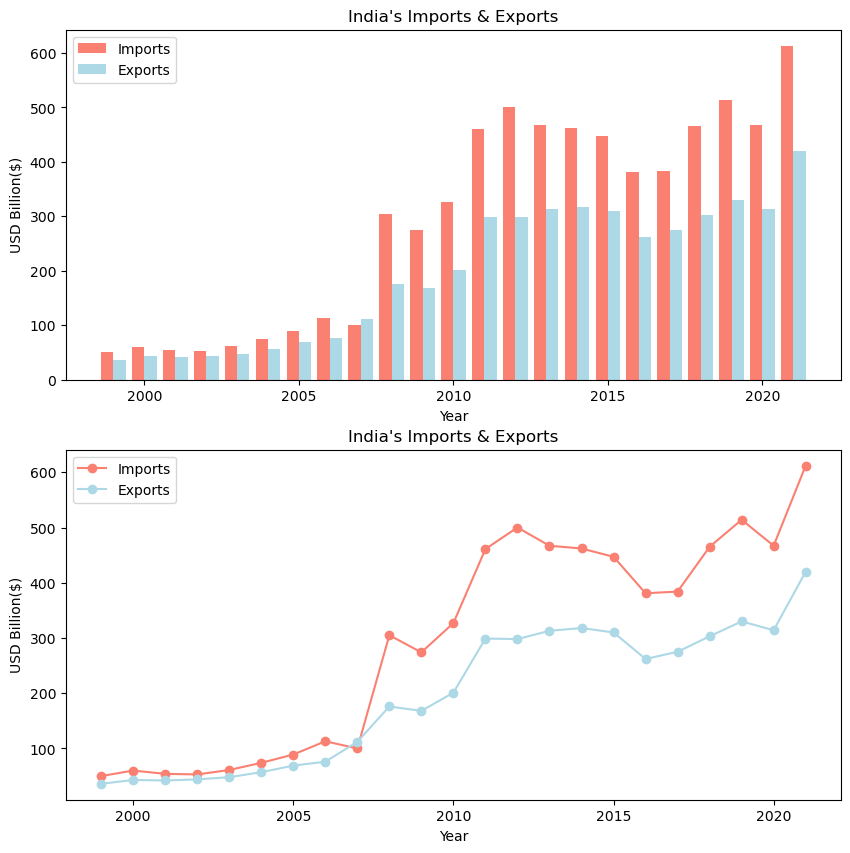

In [5]:
import matplotlib.pyplot as plt

# Assuming you have imported your DataFrame as 'df1'

fig, ax = plt.subplots(2, 1, figsize=(10, 10))

# Define the positions for the bars
x = df1["year"]

# Width of each bar
width = 0.4

# Create the bar chart for Imports
ax[0].bar(x - width/2, df1["Imports (in USD Billion)"], width, label="Imports", color="salmon")

# Create the bar chart for Exports
ax[0].bar(x + width/2, df1["Exports (in USD Billion)"], width, label="Exports", color="lightblue")

# Customize the plot
ax[0].set_xlabel("Year")
ax[0].set_title("India's Imports & Exports")
ax[0].set_ylabel("USD Billion($)")
ax[0].legend()


ax[1].plot(df1["year"], df1["Imports (in USD Billion)"], label="Imports", color="salmon", marker='o')

# Plot the line for Exports
ax[1].plot(df1["year"], df1["Exports (in USD Billion)"], label="Exports", color="lightblue", marker='o')

# Customize the plot
ax[1].set_xlabel("Year")
ax[1].set_title("India's Imports & Exports")
ax[1].set_ylabel("USD Billion($)")
ax[1].legend()

plt.show()


**India's Trade Deficit In USD Billion($)**

Text(0, 0.5, 'USD Billion($)')

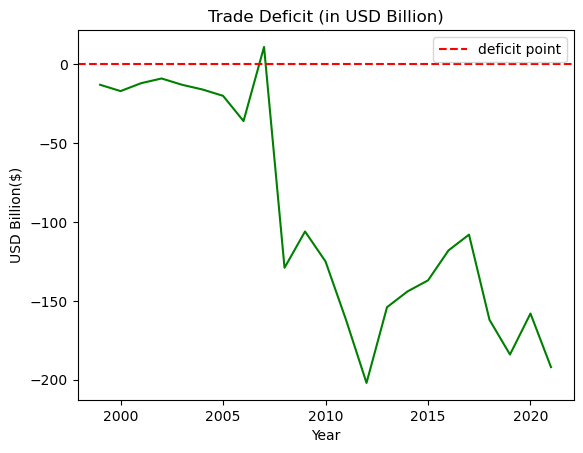

In [6]:
plt.plot(df1["year"],df1["Trade Deficit (in USD Billion)"],color="green")
plt.title("Trade Deficit (in USD Billion)")
plt.axhline(y=0,linestyle="--",color="r",label="deficit point")
plt.legend()
plt.xlabel("Year")
plt.ylabel("USD Billion($)")

Here we saw our Indian Foreign Trade `conclusion`


**Trade Deficit Fluctuations:** 
1. The trade deficit, which is the difference between exports and imports, has fluctuated over the years. It started with a deficit of around 13 billion in 1999, reached its peak deficit of -$202 billion in 2012, and then improved slightly in recent years, with a deficit of -192 billion in 2021.

**Export Growth:** 
1. Exports have generally increased over the years, with a noticeable upward trend from 1999 to 2008, when exports nearly quadrupled from 36 billion to $176 billion. However, after 2008, there were fluctuations and exports experienced a decline before stabilizing in recent years.

**Import Growth:** 
1. Imports have also increased over the years, but the growth rate has been somewhat consistent. They increased from 50 billion in 1999 to 612 billion in 2021.

**Trade Imbalance:** 
1. The trade deficit widened significantly from 2009 to 2012, during which it exceeded 100 billion. This period represents a trade deficit crisis where the country was importing significantly more than it was exporting. In recent years, the deficit has improved slightly, but it still remains at a significant level.

**Economic Impact:** 
1. A large and persistent trade deficit can have various economic implications. It can put pressure on the country's currency, lead to job displacement, and impact the overall balance of payments. It's important for policymakers to monitor and address trade imbalances to ensure economic stability.

## Currency Exchange Rates Rupees For `UDS & POUND`

In [7]:
excel2 = openpyxl.Workbook()
sheet = excel2.active
sheet.title = "currency exchange rates"
sheet.append(['year','INR per dollar','INR per pound'])
try :
    response = requests.get("https://en.wikipedia.org/wiki/Economy_of_India#Economic_issues")
    soup = BeautifulSoup(response.text,'html.parser')
    data = soup.find("table",class_ = "wikitable floatleft")
    data = data.find("tbody").find_all("tr")
    for row in data:
            r = row.find_all("td")
            res = []
            for datas in r:
                res.append(datas.get_text(strip = True))
            sheet.append(res)
    

except Exception as e:
    print(e)
    
excel2.save('currency exchange rates.xlsx')

**lets start visualize our Data**

Currency Exchange

In [8]:
df2=pd.read_excel("currency exchange rates.xlsx")

df2.drop(0,inplace=True)

df2["year"]=df2["year"].astype("int")

df2["INR per dollar"] = pd.to_numeric(df2["INR per dollar"], errors='coerce')
df2["INR per pound"] = pd.to_numeric(df2["INR per pound"], errors='coerce')

df2["INR per dollar"] = df2["INR per dollar"].round(2)

df2

,year,INR per dollar,INR per pound
1,1947,3.31,13.3300
2,1950,4.76,NaN
3,1967,7.50,17.7600
4,1975,9.41,NaN
5,1980,7.88,NaN
6,1985,12.36,NaN
7,1987,NaN,21.1800
8,1990,17.50,31.0700
9,1995,32.42,51.1700
10,2000,44.94,67.9900


(1940.0, 2029.0)

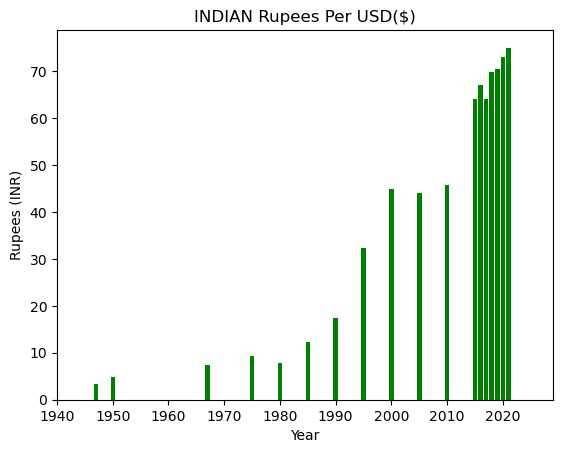

In [9]:
x = df2.year

plt.bar(x,df2["INR per dollar"],color=["green"])
plt.title("INDIAN Rupees Per USD($)")
plt.xlabel("Year")
plt.ylabel("Rupees (INR)")
plt.xlim(1940,2029)

(1960.0, 2029.0)

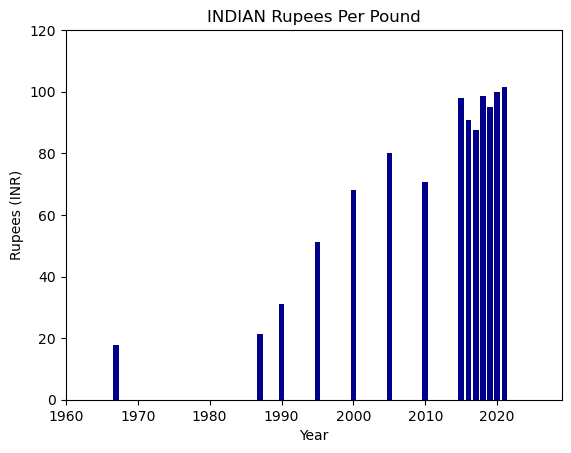

In [10]:
plt.bar(df2.year,df2["INR per pound"],color=["darkblue"])

plt.title("INDIAN Rupees Per Pound")
plt.xlabel("Year")
plt.ylabel("Rupees (INR)")
plt.ylim(0,120)
plt.xlim(1960,2029)

(0.0, 120.0)

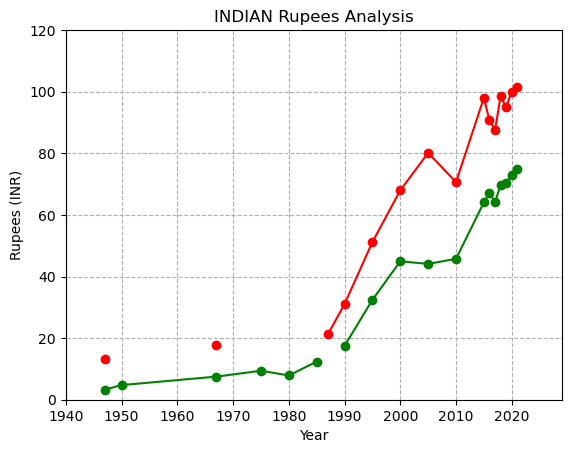

In [11]:
plt.plot(df2.year,df2["INR per dollar"],color="g",marker="o",label="USD($)")
plt.plot(df2.year,df2["INR per pound"],color="r",marker="o",label="Pound")
plt.xlabel("Year")
plt.ylabel("Rupees (INR)")
plt.grid(linestyle='--')
plt.title("INDIAN Rupees Analysis")
plt.xlim(1940,2029)
plt.ylim(0,120)

Here we saw Exanchange Rate of India `INR per dollar`	`INR per pound` (Conlusion):

**Currency Risk:**

For businesses or investors, understanding these historical exchange rates can help assess currency risk when dealing with international transactions.

**Yearly Variations:**

There are variations in exchange rates from year to year, and these fluctuations can be influenced by various economic and geopolitical factors.

**Exchange Rate Trends:**

1. The exchange rate of INR per dollar has generally been on an upward trend since 1947, with some fluctuations. It started at 3.31 INR per dollar in 1947 and increased to 74.98 INR per dollar in 2021.

2. The exchange rate of INR per pound has also shown an increasing trend, although the data has several missing values. In 1987, the data suddenly jumps to 21.18 INR per pound.

## Exchange Rate of Indian Rupees (1974-2022)
1. USD (United States dollar, United States dollar)
2. GBP (pound sterling )
3. DM/EUR (Deutsche mark)
4. JPY (Japanese yen)


In [12]:
excel3 = openpyxl.Workbook()
sheet = excel3.active
sheet.title = "Exchange Rate of the Indian Rupee"
sheet.append(['year','SDR(avg)','SDR(end year)','USD (avg)','USD (end year)','GBP (avg)','GBP(end year)','DM/EUR(avg)','DM/EUR(end year)','JPY(avg)','JPY(end year)'])
try:
    response = requests.get("https://en.wikipedia.org/wiki/Exchange_rate_history_of_the_Indian_rupee")
    soup = BeautifulSoup(response.text,"html.parser")
    data = soup.find("table",class_ = "wikitable")
    data = data.find("tbody").find_all("tr")
    for row in data:
        data = row.find_all("td")
        res = []
        for val in data:
            res.append(val.get_text(strip = True))
        sheet.append(res)
         
except Exception as e:
    print(e)
excel3.save('exchange rate of Indian rupees.xlsx')

C:\Users\thesu\anaconda3\lib\site-packages\openpyxl\workbook\child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


In [13]:
df3=pd.read_excel("exchange rate of Indian rupees.xlsx")
df3.drop(0,inplace=True)

In [14]:
drops = ["SDR(avg)","SDR(end year)",]
df3.drop(drops,axis = 1,inplace = True)
df3.drop("year",axis =1)

year = [i for i in range(1973,2024)]

years = pd.Series(year)

df3["year"] = years
df3.head()

,year,USD (avg),USD (end year),GBP (avg),GBP(end year),DM/EUR(avg),DM/EUR(end year),JPY(avg),JPY(end year)
1,1974,7.9408,7.794,18.8000,18.776,3.1917,3.324,3.00,2.7
2,1975,8.6825,8.973,18.3933,17.190,3.4458,3.535,3.00,3.0
3,1976,8.9775,8.804,15.5733,15.144,3.6308,3.686,3.00,3.2
4,1977,8.5858,8.434,15.4292,15.656,3.8358,4.169,3.33,3.8
5,1978,8.2267,8.150,15.9658,16.861,4.2200,4.364,4.00,3.9


**Notes**
1. The data on exchange rate for Japanese Yen is in per 100 Yen.
2. The end year rate for 1998–99 pertain to March 26, 1999 of Deutsche Mark rate.
3. Data from 1971 to 1991–92 are based on official exchange rates.
4. Data from 1992 to 1993 onward are based on FEDAI (Foreign Exchange Dealers' Association of India) indicative rates.
5. Data from 1971 to 1972–73 for the Deutsche Mark and the Japanese Yen are cross rates with the US Dollar.
6. The Euro replaced the Deutsche Mark w.e.f. January 1, 1999

## INR over the years with `USD(1974-2022)`

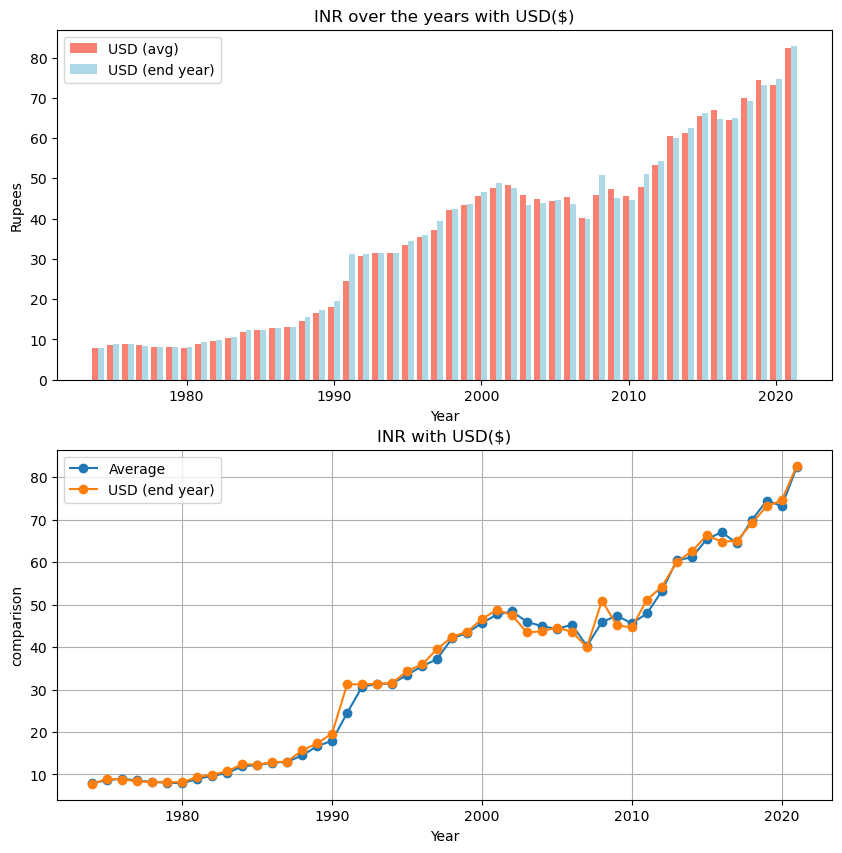

In [15]:
# Assuming you have imported your DataFrame as 'df1'
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

x = df3["year"]
width = 0.4


ax[0].set_title("INR over the years with USD($)")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Rupees")
ax[0].bar(x - width/2,df3["USD (avg)"],width = width, color = 'salmon',label = "USD (avg)")
ax[0].bar(x + width/2,df3["USD (end year)"],width = width, color = 'lightblue',label = "USD (end year)")
ax[0].legend()



ax[1].plot(df3['year'], df3['USD (avg)'], marker='o', label='Average')
ax[1].plot(df3['year'], df3['USD (end year)'], marker='o', label='USD (end year)')
ax[1].set_title('INR with USD($)')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('comparison')
ax[1].legend()
ax[1].grid(True)

# Show the plot
plt.show()

**Recent Years: In the most recent years (2020 and 2021)**
1. the data shows a relatively stable exchange rate for the USD compared to previous years. This could be due to various economic policies and global economic conditions.
**Long-Term Trends:** 
1. It appears that, in the earlier years, the USD was generally weaker, but it gained strength over time.
**Economic Events:**
1. To provide more meaningful conclusions, it would be essential to correlate this data with specific economic events, such as recessions, trade agreements, political developments, and more.

**Volatility:**
1. There are periods of significant volatility, where the exchange rate changes are substantial, suggesting that external economic and political factors may be impacting the value of the USD.

## INR over the years with `GBP(1974-2022)`

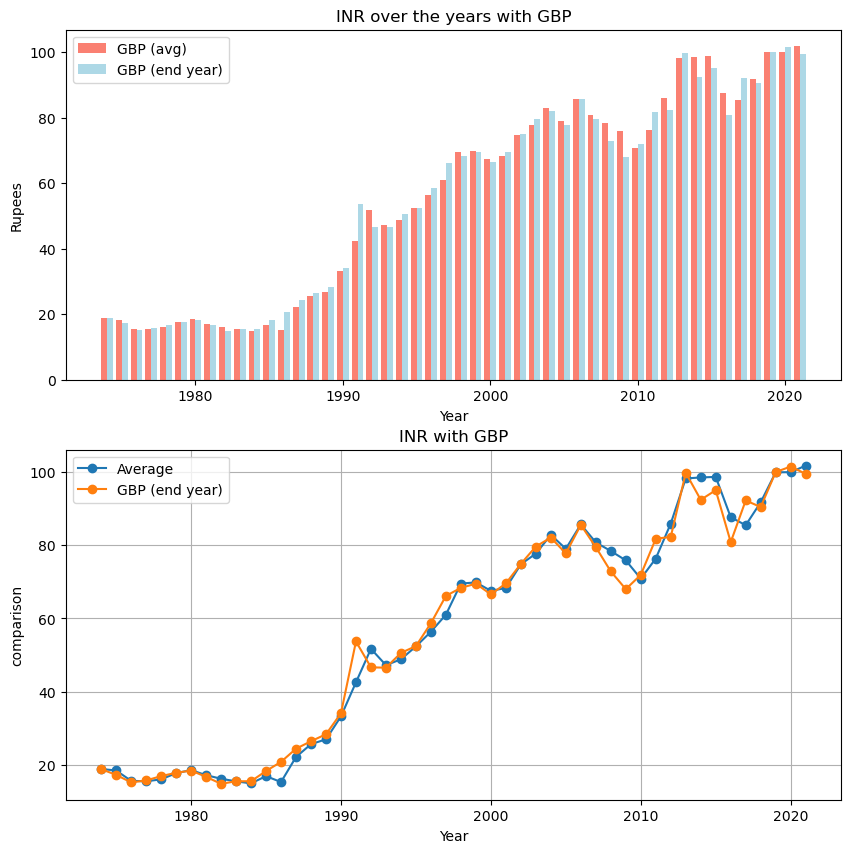

In [16]:
# Assuming you have imported your DataFrame as 'df1'
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

x = df3["year"]
width = 0.4


ax[0].set_title("INR over the years with GBP")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Rupees")
ax[0].bar(x - width/2,df3["GBP (avg)"],width = width, color = 'salmon',label = "GBP (avg)")
ax[0].bar(x + width/2,df3["GBP(end year)"],width = width, color = 'lightblue',label = "GBP (end year)")
ax[0].legend()



ax[1].plot(df3['year'], df3['GBP (avg)'], marker='o', label='Average')
ax[1].plot(df3['year'], df3['GBP(end year)'], marker='o', label='GBP (end year)')
ax[1].set_title('INR with GBP')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('comparison')
ax[1].legend()
ax[1].grid(True)

# Show the plot
plt.show()

conclusion(GBP)

**Exchange Rate Fluctuations:** 
1. The data in the 5th column reflects the exchange rate or value of the Japanese Yen (JPY) relative to another currency or a commodity. Exchange rates are known to fluctuate over time due to various economic, financial, and geopolitical factors.

**Periods of Volatility:** 
1. The data shows that there are periods of significant volatility, where the value of the JPY experiences notable changes. These periods of volatility may be linked to specific economic events, policies, or global market conditions.

**Currency Strength and Weakness:** 
1. The fluctuations in the exchange rate indicate times when the JPY either gained or lost value relative to another currency or commodity. This has implications for trade, investment, and monetary policy decisions in Japan.

**Economic Context:** 
1. To gain a deeper understanding of the data in the 5th column, it would be necessary to analyze the specific economic events and factors that influenced these exchange rate fluctuations. For instance, changes in Japan's monetary policy, economic growth, and international trade can affect the value of the JPY.

**Historical Reference:** 
1. The data serves as a historical record of how the Japanese Yen performed in the foreign exchange market during the specified time period. It can be valuable for economic historians, analysts, and policymakers.

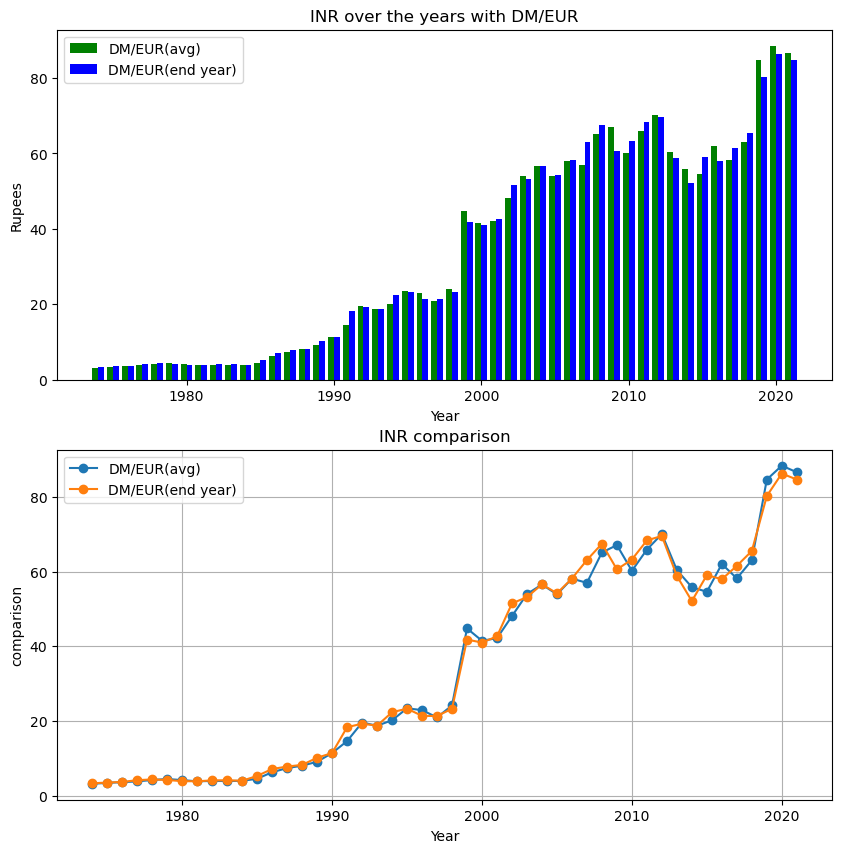

In [22]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

width = 0.4

ax[0].set_title("INR over the years with DM/EUR")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Rupees")
ax[0].bar(x - width/2,df3["DM/EUR(avg)"],width = width, color = 'green',label = "DM/EUR(avg)")
ax[0].bar(x + width/2,df3["DM/EUR(end year)"],width = width, color = 'blue',label = "DM/EUR(end year)")
ax[0].legend()




ax[1].plot(df3['year'], df3['DM/EUR(avg)'], marker='o', label='DM/EUR(avg)')
ax[1].plot(df3['year'], df3['DM/EUR(end year)'], marker='o', label='DM/EUR(end year)')
ax[1].set_title('INR comparison')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('comparison')
ax[1].legend()
ax[1].grid(True)

**Exchange Rate Fluctuations:** 
1. the exchange rate between Deutsche Mark (DM) and Euro (EUR) during a transitional period. While the exchange rate was initially set at 1:1 parity during the Euro's introduction, the data shows that exchange rates between these two currencies fluctuated over time.

**Variability in Exchange Rates:** 
1. Exchange rate fluctuations are common in currency markets and can be influenced by a variety of factors, including economic conditions, monetary policy, and geopolitical events.

**Currency Transition:** 
1. The fluctuations in the exchange rate between DM and EUR may have been influenced by the gradual transition from the Deutsche Mark to the Euro, as well as economic and political developments within the Eurozone.

**Economic Events:**
1. To gain a deeper understanding of the fluctuations in this exchange rate, it would be necessary to analyze the specific economic events and policies that influenced these changes.

**Historical Record:** 
1. This column serves as a historical record of the exchange rate dynamics during the transition from DM to EUR, which is valuable for researchers and historians interested in the monetary and economic history of Europe.

**Currency Conversion:** 
1. During the transition period, the exchange rate data played a crucial role in assessing the economic implications of converting DM-denominated assets and transactions into Euro-denominated ones.

**Monetary Union:** 
1. The transition from DM to EUR was part of the broader process of European monetary union, aimed at achieving economic integration and stability among Eurozone countries.







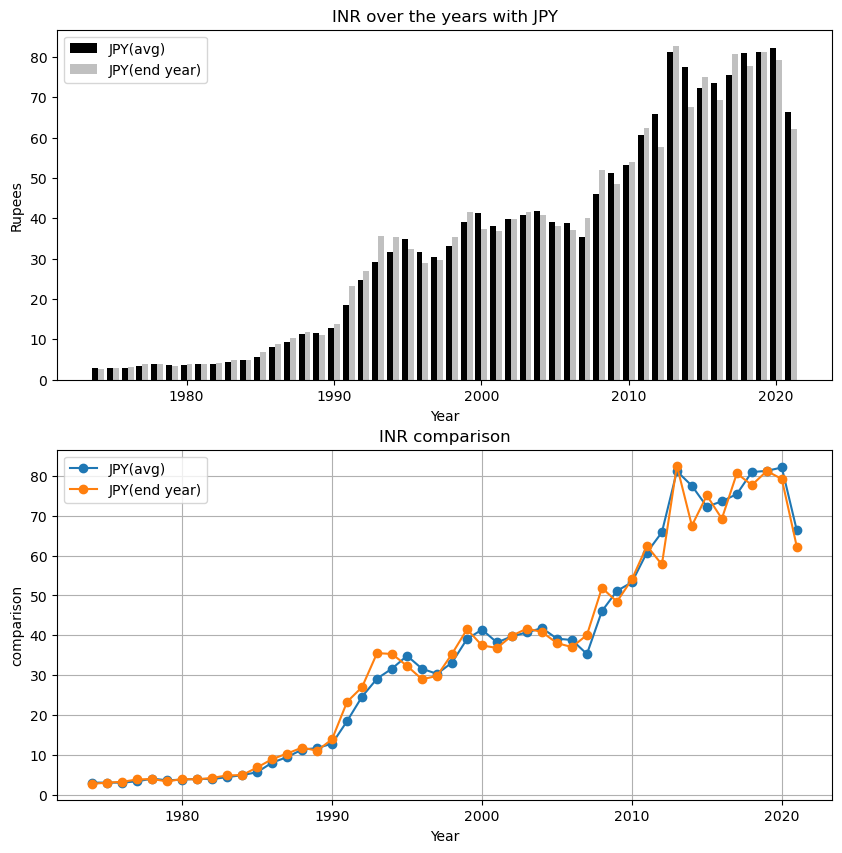

In [24]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

width = 0.4

ax[0].set_title("INR over the years with JPY")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Rupees")
ax[0].bar(x - width/2,df3["JPY(avg)"],width = width, color = 'black',label = "JPY(avg)")
ax[0].bar(x + width/2,df3["JPY(end year)"],width = width, color = 'silver',label = "JPY(end year)")
ax[0].legend()




ax[1].plot(df3['year'], df3['JPY(avg)'], marker='o', label='JPY(avg)')
ax[1].plot(df3['year'], df3['JPY(end year)'], marker='o', label='JPY(end year)')
ax[1].set_title('INR comparison')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('comparison')
ax[1].legend()
ax[1].grid(True)


**Exchange Rate Fluctuations:** 
1. The data shows that the exchange rate of the JPY to various other currencies and commodities has fluctuated over the years. This is typical of exchange rate dynamics and is influenced by a variety of economic and geopolitical factors.

**Volatility Over Time:** 
1. There are noticeable periods of exchange rate volatility, where the JPY either gained or lost value. These periods often correspond to significant global economic events, such as financial crises, economic policies, and geopolitical tensions.

**Transition to the Euro (EUR):**
1. The dataset covers a period that includes the transition from the Deutsche Mark (DM) to the Euro (EUR) as the official currency in Europe. This transition likely impacted the JPY's exchange rates.

**Currency Values:**
1. It's clear that the values of the JPY relative to other currencies and commodities changed significantly over the years, indicating the relative strength or weakness of the JPY in the international markets.

**Historical Reference:** 
1. The data serves as a valuable historical reference for economists, analysts, and policymakers interested in understanding the behavior of the JPY in the global foreign exchange market.

In [1]:
import requests,openpyxl
from bs4 import BeautifulSoup

excel2 = openpyxl.Workbook()
sheet = excel2.active
sheet.title = "national GDP of cities"
sheet.append(['Metropolitan area','GDP(billion USD)','Country','National GDP(billion USD)','% of National GDP'])



try:
    response = requests.get("https://en.wikipedia.org/wiki/List_of_cities_by_GDP")
    soup = BeautifulSoup(response.text, 'html.parser')
    movies = soup.find('div', id ="mw-content-text").find_all("table")
    count = 0
    for table in movies:
        count += 1
        wanted = table
        if count == 3:
            break
    table_row = wanted.find("tbody").find_all("tr")
    for row in table_row:
        data = row.find_all("td")
        res = []
        for d in data:
            res.append(d.get_text(strip = True))
        sheet.append(res)    
#         print(res)

        
except Exception as e:
    print(e)
    
excel2.save('GDP by countries.xlsx')

In [2]:
import pandas as pd
datas = pd.read_excel("GDP by countries.xlsx")
datas

,Metropolitan area,GDP(billion USD),Country,National GDP(billion USD),% of National GDP
0,NaN,NaN,NaN,NaN,NaN
1,City of San Marino,1.54,San Marino,1.70,90.872
2,Luxembourg City-Trier,69.45,Luxembourg,86.90,79.925
3,Montevideo,49.70,Uruguay,64.28,77.314
4,Karachi,200.00,Pakistan,348.30,57.430
...,...,...,...,...,...
58,Kyiv,25.70,Ukraine,198.32,12.959
59,Nairobi,14.80,Kenya,114.68,12.906
60,Mumbai,277.98,India,3534.74,7.864
61,New York,1874.40,United States,25346.81,7.395


In [3]:
import requests,openpyxl
from bs4 import BeautifulSoup

excel5 = openpyxl.Workbook()
sheet = excel5.active
sheet.title = "World's richest cities"
sheet.append(['City','Wealth'])

try:
    response = requests.get("https://en.wikipedia.org/wiki/List_of_cities_by_GDP")
    soup = BeautifulSoup(response.text, 'html.parser')
    movies = soup.find_all('table', class_ ="wikitable")
    for table in movies:
        wanted = table
    table_row = wanted.find("tbody").find_all("tr")
    for row in table_row:
        data = row.find_all("td")
        res = []
        for d in data:
            res.append(d.get_text(strip = True))
        sheet.append(res)    
        print(res)
    
except Exception as e:
    print(e)
excel5.save("World's richest cities.xlsx")

[]
['New York City', '$3 trillion']
['London', '$2.7 trillion']
['Paris', '$2.7 trillion']
['Tokyo', '$2.5 trillion']
['San Francisco', '$2.3 trillion']
['Beijing', '$2.2 trillion']
['Shanghai', '$2 trillion']
['Los Angeles', '$1.4 trillion']
['Hong Kong', '$1.3 trillion']
['Sydney', '$1 trillion']
['Singapore', '$1 trillion']
['Chicago', '$0.98 trillion']
['Mumbai', '$0.94 trillion']
['Toronto', '$0.94 trillion']
['Frankfurt', '$0.91 trillion']


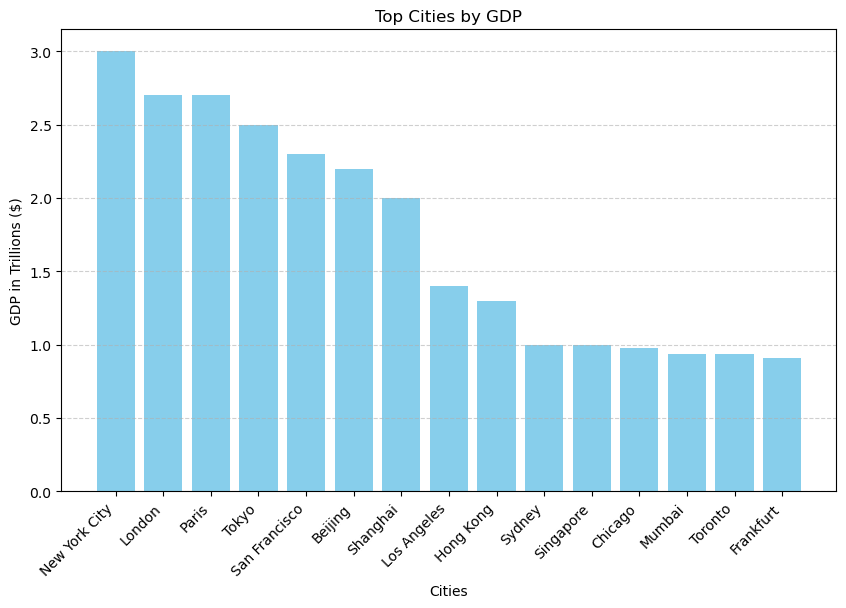

In [14]:
data = [
    ['New York City', '$3 trillion'],
    ['London', '$2.7 trillion'],
    ['Paris', '$2.7 trillion'],
    ['Tokyo', '$2.5 trillion'],
    ['San Francisco', '$2.3 trillion'],
    ['Beijing', '$2.2 trillion'],
    ['Shanghai', '$2 trillion'],
    ['Los Angeles', '$1.4 trillion'],
    ['Hong Kong', '$1.3 trillion'],
    ['Sydney', '$1 trillion'],
    ['Singapore', '$1 trillion'],
    ['Chicago', '$0.98 trillion'],
    ['Mumbai', '$0.94 trillion'],
    ['Toronto', '$0.94 trillion'],
    ['Frankfurt', '$0.91 trillion']
]

# Extract city names and GDP values
cities = [entry[0] for entry in data]
gdp_values = [float(entry[1].replace('$', '').replace(' trillion', '').replace(',', '').strip()) for entry in data]

plt.figure(figsize=(10, 6))
plt.bar(cities, gdp_values, color='skyblue')
plt.xlabel('Cities')
plt.ylabel('GDP in Trillions ($)')
plt.title('Top Cities by GDP')

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()


In [4]:
f = pd.read_excel("World's richest cities.xlsx")

f["Wealth"] = f["Wealth"].str.replace("$"," ").str.replace("trillion"," ")
f['Wealth'] = pd.to_numeric(f['Wealth'])
f.drop(0,inplace = True)
f

C:\Users\jayan\AppData\Local\Temp\ipykernel_15156\3476654370.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  f["Wealth"] = f["Wealth"].str.replace("$"," ").str.replace("trillion"," ")


,City,Wealth
1,New York City,3.00
2,London,2.70
3,Paris,2.70
4,Tokyo,2.50
5,San Francisco,2.30
6,Beijing,2.20
7,Shanghai,2.00
8,Los Angeles,1.40
9,Hong Kong,1.30
10,Sydney,1.00


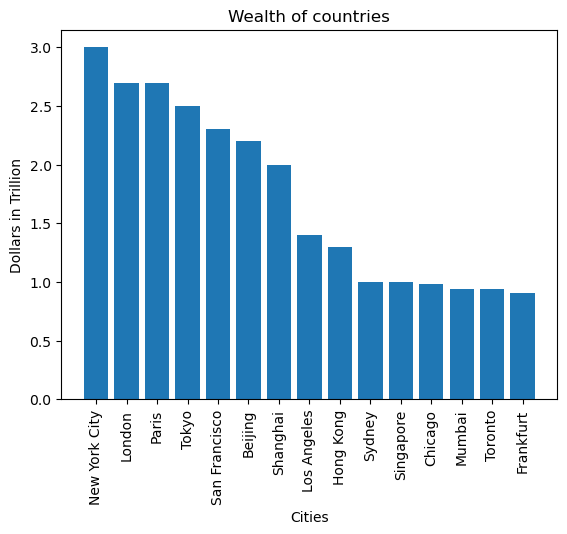

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

x = f["City"]
y = f["Wealth"]

plt.bar(x , y)
plt.xticks(rotation=90); 
plt.title("Wealth of countries");
plt.ylabel("Dollars in Trillion")
plt.xlabel("Cities");

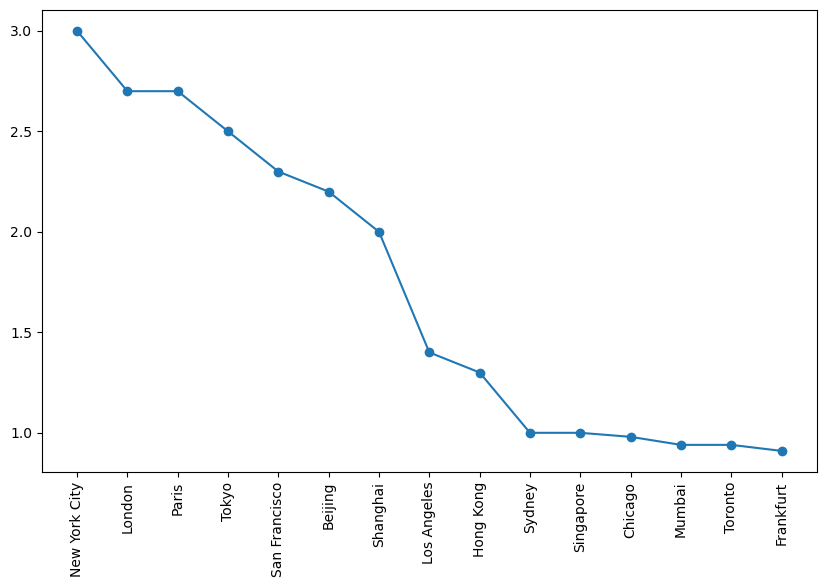

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(f['City'], f['Wealth'], marker='o', label='JPY')
plt.xticks(rotation=90);

Comparison of Wealth of top metropolitan cities in the world Mumbai: Mumbai, India, is one of the cities on the list with an estimated wealth of "$0.94 trillion." Mumbai is a major financial and economic hub in India, often referred to as the financial capital of the country.

Other Countries: Most of the other cities or regions listed, such as New York City, London, Paris, Tokyo, San Francisco, Beijing, Shanghai, Los Angeles, Hong Kong, Singapore, Toronto, and Frankfurt, have significantly higher estimated wealth compared to Mumbai. These cities are well-known global economic centers and major financial districts.

In summary, while Mumbai is a significant economic center in India, it has a comparatively lower estimated wealth when compared to many major cities in other countries, which are global economic powerhouses. This observation underscores the economic diversity and varying levels of economic development across different regions and countries.